# 3. Linear Regression – Applied

In [51]:
from pathlib import Path
import pandas as pd
import statsmodels.api  as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Q8**

In [3]:
path = Path('d:/ML_anyag/ISLR/ISLR_python_AB/Notebooks/Data/Auto.csv')

In [10]:
Auto = pd.read_csv(path)
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [38]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
X1 = Auto['horsepower']
Y = Auto['mpg']

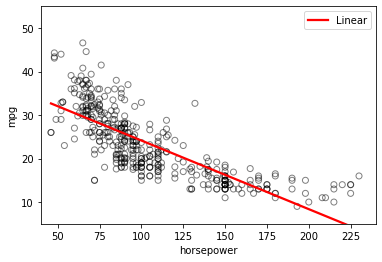

In [33]:
plt.scatter(X1, Y, facecolors='None', edgecolors='k', alpha=.5)
sns.regplot(X1, Y, ci=None, label='Linear', scatter=False, color='red')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [17]:
results = sm.OLS(Y,X).fit()

In [18]:
results.params

const         39.935861
horsepower    -0.157845
dtype: float64

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           7.03e-81
Time:                        10:09:11   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# i., Is there a relationship between the predictor and the response? 
# We can answer this question by testing the null hypothesis. 
# The p-value corresponding to the F-statistic is 7.03198910^{-81}, this indicates a clear evidence of a relationship between “mpg” and “horsepower”.

# ii., How strong is the relationship between the predictor and the response?
# We can use the residual standard error and the R-squared value for answering this question.
# The mean of mpg is 23.4459184. The RSE of the lm.fit was 4.9057569 which indicates a percentage error of 20.9237141%. 
# We may also note that as the R2 is equal to 0.6059483, almost 60.5948258% of the variability in “mpg” can be explained 
# using “horsepower”.

# In Python statsmodel we can calculate residual standard error or the residual standard deviation by taking the square root of the scale attribute:
# print(np.sqrt(results.scale))
# Or we can calculate mannually: 
# print(np.sqrt(np.divide(results.ssr, np.subtract(len(Auto), 2))))

# iii. Is the relationship between the predictor and the response positive or negative?
# This is can be answered by looking at the plotted regression line or the regression coeficient. 
# Since horsepower is negative the relationship is also negative, meaning that more horsepower results in less mpg.

In [113]:
# iv., What is the predicted mpg associated with a horsepower of 98? 
# What are the associated 95% conﬁdence and prediction intervals?
number = [1, 98]
results.predict(number)

array([24.46707715])

In [149]:
pred = results.get_prediction(X)

In [150]:
pred.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,19.416046,0.297444,18.831250,20.000841,9.753295,29.078797
1,13.891480,0.462181,12.982802,14.800158,4.203732,23.579228
2,16.259151,0.384080,15.504025,17.014277,6.584598,25.933704
3,16.259151,0.384080,15.504025,17.014277,6.584598,25.933704
4,17.837598,0.337403,17.174242,18.500955,8.169775,27.505422
...,...,...,...,...,...,...
387,26.361214,0.274892,25.820758,26.901669,16.701045,36.021383
388,31.727935,0.419246,30.903669,32.552201,22.047739,41.408130
389,26.676903,0.280715,26.124999,27.228808,17.016087,36.337720
390,27.466127,0.297226,26.881761,28.050493,17.803402,37.128852


C:\Users\alfoldybalint\.conda\envs\geo_py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alfoldybalint\.conda\envs\geo_py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alfoldybalint\.conda\envs\geo_py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

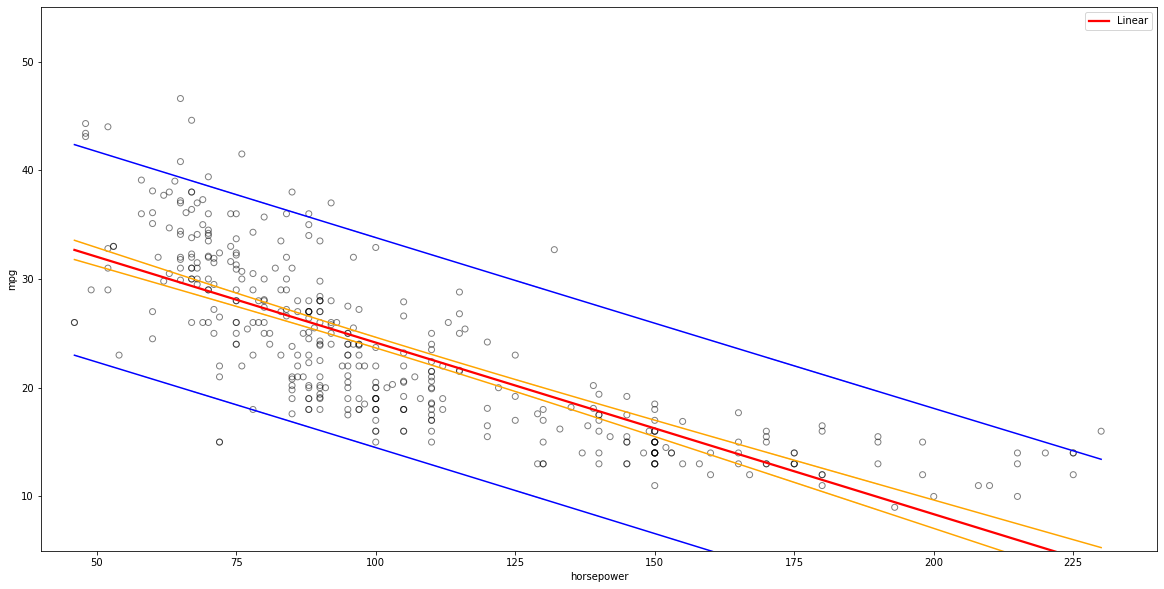

In [151]:
plt.figure(figsize = (20, 10))
plt.scatter(X1, Y, facecolors='None', edgecolors='k', alpha=.5)
sns.regplot(X1, Y, ci=None, label='Linear', scatter=False, color='red')
sns.lineplot(X1, pred.summary_frame().obs_ci_lower, color = 'blue')
sns.lineplot(X1, pred.summary_frame().obs_ci_upper, color = 'blue')
sns.lineplot(X1, pred.summary_frame().mean_ci_lower, color = 'orange')
sns.lineplot(X1, pred.summary_frame().mean_ci_upper, color = 'orange')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [188]:
pred98 = results.get_prediction([1, 98])
pred98.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


In [161]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           7.03e-81
Time:                        13:53:40   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
conf_B1_max = -0.1578+0.006
conf_B1_min = -0.1578-0.006

In [192]:
conf_B1_max



-0.1518

In [193]:
conf_B1_min

-0.1638

In [194]:
conf_B0_max = 39.9359+0.717
conf_B0_min = 39.9359-0.717

In [195]:
conf_B0_max

40.652899999999995

In [196]:
conf_B0_min

39.2189

In [197]:
98*conf_B1_max+conf_B0_max

25.7765

In [198]:
98*conf_B1_min+conf_B0_min

23.1665

In [199]:
results.conf_int()

,0,1
const,38.525212,41.346510
horsepower,-0.170517,-0.145172
